# Samuel Cuellar - 202210745
#Entrega 4 final
#Introducción a los datos computacionales

El trabajo se hizo bajo la premisa de cómo medir la popularidad según la cantida de veces que aparece un artista en una playlist.
Se tuvieron esta hoja de ruta para seguir y terminar con las preguntas

Para abordar la pregunta sobre la relación entre los artistas más escuchados y las playlists más escuchadas, vamos a considerar varios aspectos y generar gráficos que puedan ayudarnos a entender estas relaciones.

**Gráficos Propuestos**
1. Número de canciones de los artistas más populares en las playlists más populares.
2. Duración total de las canciones de los artistas más populares en las playlists más populares.
3. Número de playlists que incluyen canciones de los artistas más populares.
4. Número de seguidores de las playlists que contienen canciones de los artistas más populares.
5. Número de Canciones y Popularidad Promedio de los Top 5 Artistas Más Populares
6. CONCLUSIÓN.

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos SQLite

conn = sqlite3.connect('/content/drive/MyDrive/music_smaller_10000.db')


In [15]:
# Obtener la lista de tablas en la base de datos
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,slice_time
1,playlists
2,song


In [29]:
# Seleccionar los top 10 artistas más populares
top_10_artists = song_df['artist_name'].value_counts().head(10).index
top_artists_df = song_df[song_df['artist_name'].isin(top_10_artists)]

# Seleccionar las top 10 playlists más populares por número de seguidores
top_10_playlists = playlists_df.sort_values(by='num_followers', ascending=False).head(10)

# Filtrar las canciones que están en las top 10 playlists
top_playlists_songs = song_df[song_df['pid'].isin(top_10_playlists['pid'])]

# Contar el número de canciones por artista en las top 10 playlists
artist_song_count = top_playlists_songs[top_playlists_songs['artist_name'].isin(top_10_artists)]['artist_name'].value_counts()



#¿Qué relación hay entre las playlist, seguidores, y los artistas top de spotify?
#¿Cómo medir la popularidad?

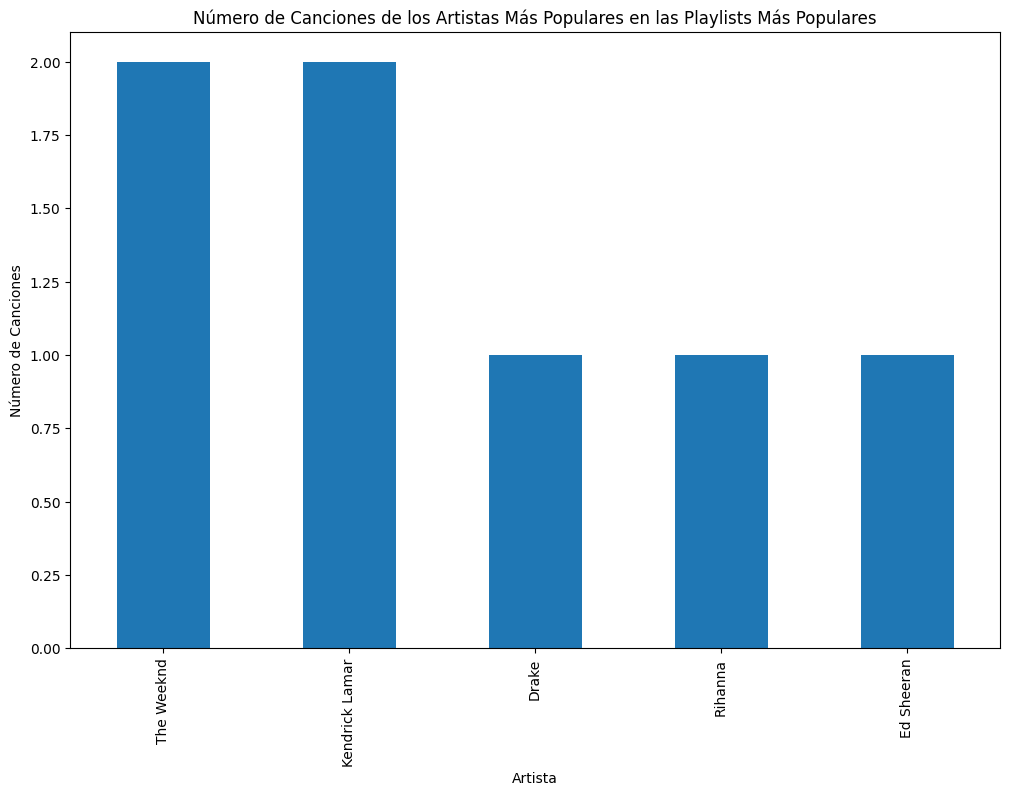

In [41]:
#Primero cual es el número de canciones de los artistas más populares en las playlists más populares.
plt.figure(figsize=(12, 8))
artist_song_count.plot(kind='bar')
plt.title('Número de Canciones de los Artistas Más Populares en las Playlists Más Populares')
plt.xlabel('Artista')
plt.ylabel('Número de Canciones')
plt.show()


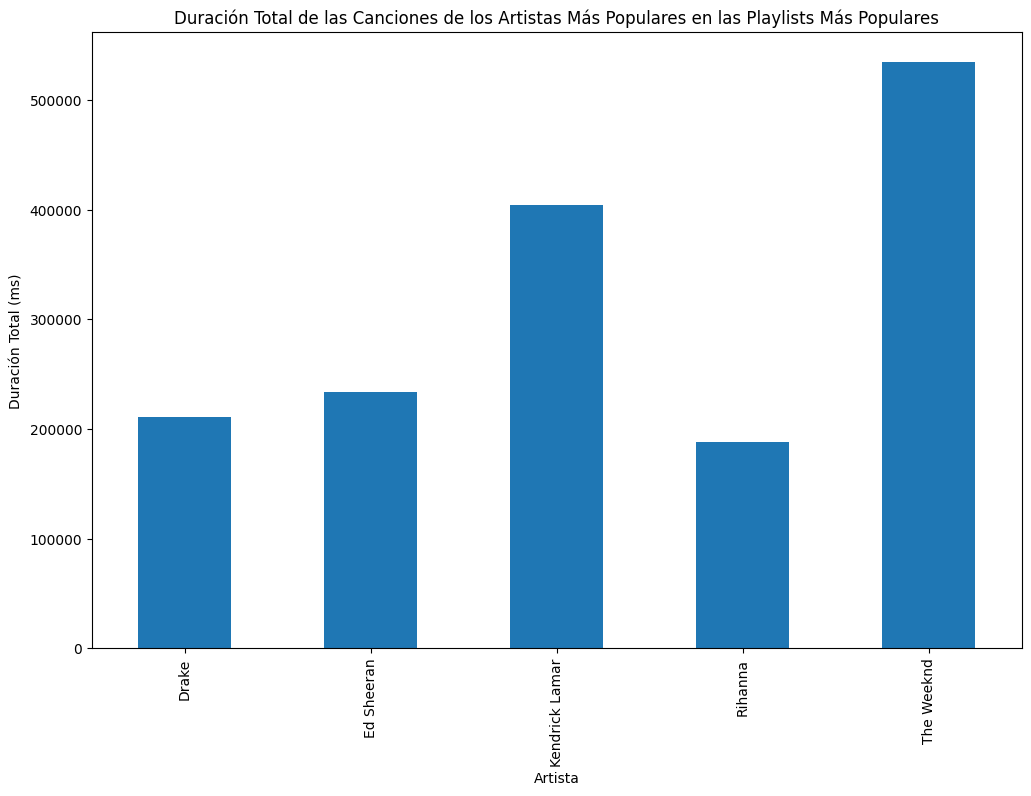

In [42]:
# Segundo duración total de las canciones de los artistas más populares en las playlists más populares.
artist_duration_sum = top_playlists_songs[top_playlists_songs['artist_name'].isin(top_10_artists)].groupby('artist_name')['duration_ms'].sum()

plt.figure(figsize=(12, 8))
artist_duration_sum.plot(kind='bar')
plt.title('Duración Total de las Canciones de los Artistas Más Populares en las Playlists Más Populares')
plt.xlabel('Artista')
plt.ylabel('Duración Total (ms)')
plt.show()

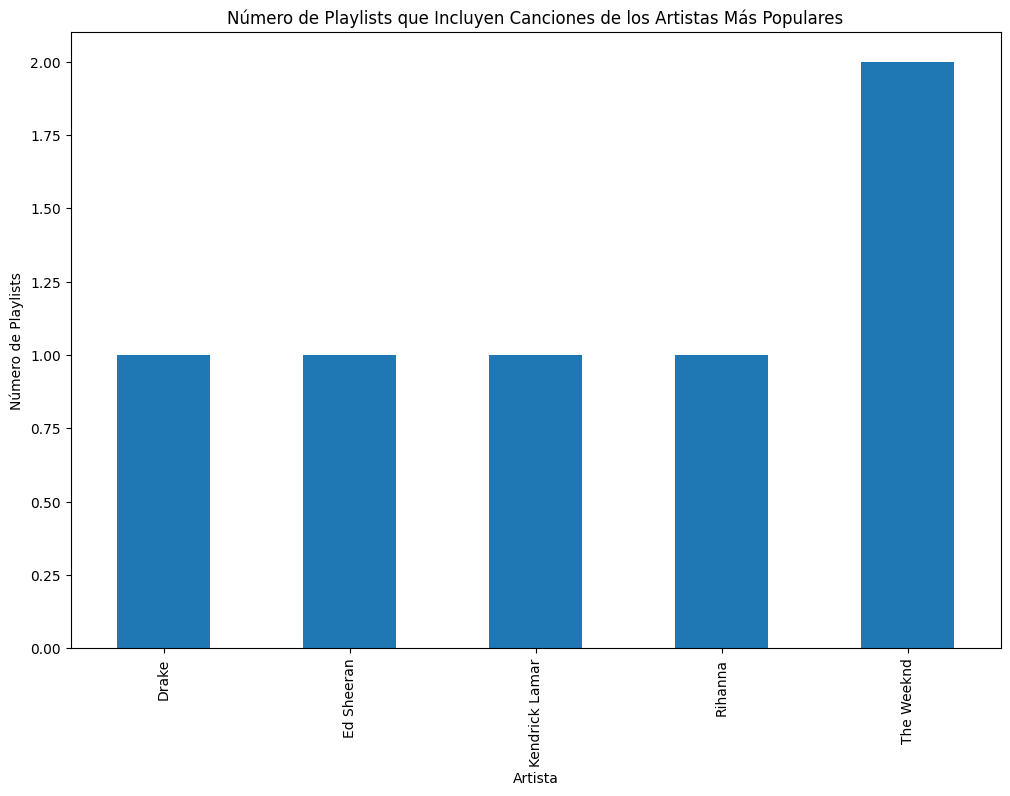

In [43]:
# Tercero para visualizar las interacciones de las personas con los artistas
#Contar el número de playlists por artista
artist_playlist_count = top_playlists_songs[top_playlists_songs['artist_name'].isin(top_10_artists)].groupby('artist_name')['pid'].nunique()

plt.figure(figsize=(12, 8))
artist_playlist_count.plot(kind='bar')
plt.title('Número de Playlists que Incluyen Canciones de los Artistas Más Populares')
plt.xlabel('Artista')
plt.ylabel('Número de Playlists')
plt.show()

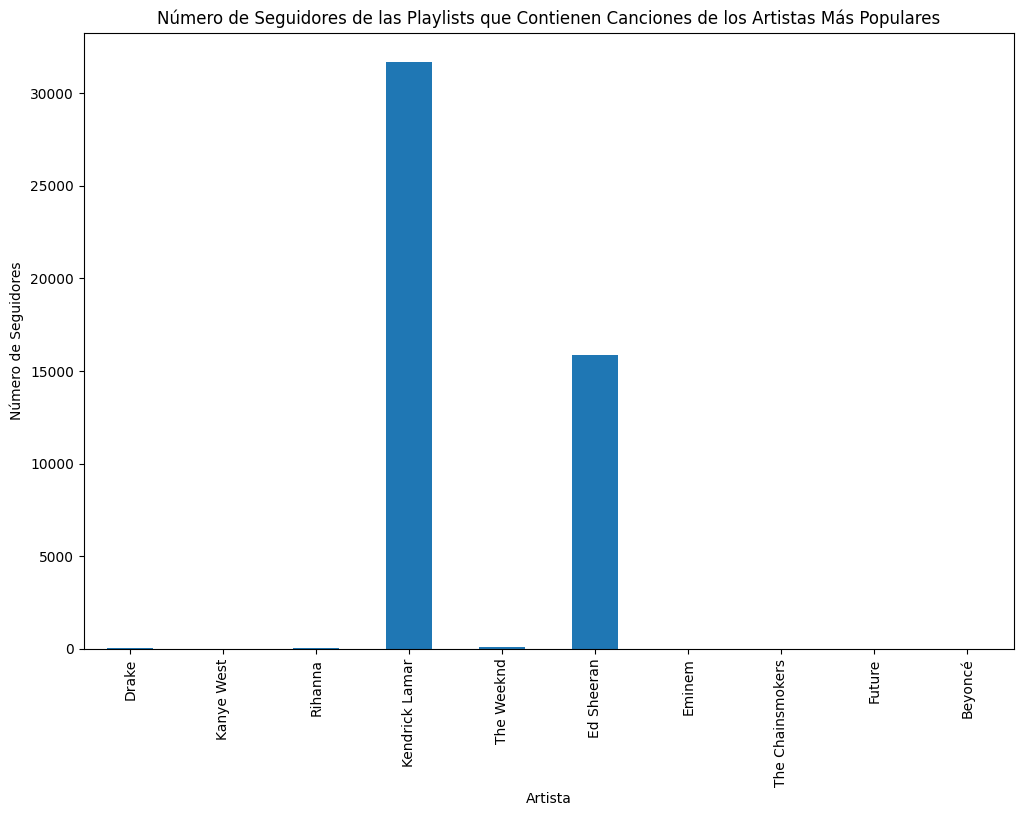

In [44]:
# Cuarto para asegurar un top marcado de artistas y sus seguidores se hace
# Número de seguidores de las playlists que contienen canciones de los artistas más populares.
# Seleccionar los top 10 artistas más populares
top_10_artists = song_df['artist_name'].value_counts().head(10).index
top_artists_df = song_df[song_df['artist_name'].isin(top_10_artists)]

# Seleccionar las top 10 playlists más populares por número de seguidores
top_10_playlists = playlists_df.sort_values(by='num_followers', ascending=False).head(10)

# Filtrar las canciones que están en las top 10 playlists
top_playlists_songs = song_df[song_df['pid'].isin(top_10_playlists['pid'])]

# Unir las canciones con las playlists para obtener el número de seguidores
merged_df = pd.merge(top_playlists_songs, playlists_df, on='pid')

# Calcular el número de seguidores por artista
artist_followers_sum = merged_df[merged_df['artist_name'].isin(top_10_artists)].groupby('artist_name')['num_followers'].sum()

# Asegurarse de que todos los artistas estén incluidos
all_artists_followers = artist_followers_sum.reindex(top_10_artists, fill_value=0)

plt.figure(figsize=(12, 8))
all_artists_followers.plot(kind='bar')
plt.title('Número de Seguidores de las Playlists que Contienen Canciones de los Artistas Más Populares')
plt.xlabel('Artista')
plt.ylabel('Número de Seguidores')
plt.show()

count    529108.000000
mean         49.967179
std          28.580043
min           1.000000
25%          25.000000
50%          50.000000
75%          75.000000
max          99.000000
Name: popularity, dtype: float64


<ipython-input-60-04211e6c8bb3>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_df.index, y='song_count', data=combined_df, ax=ax1, palette='Blues_d')


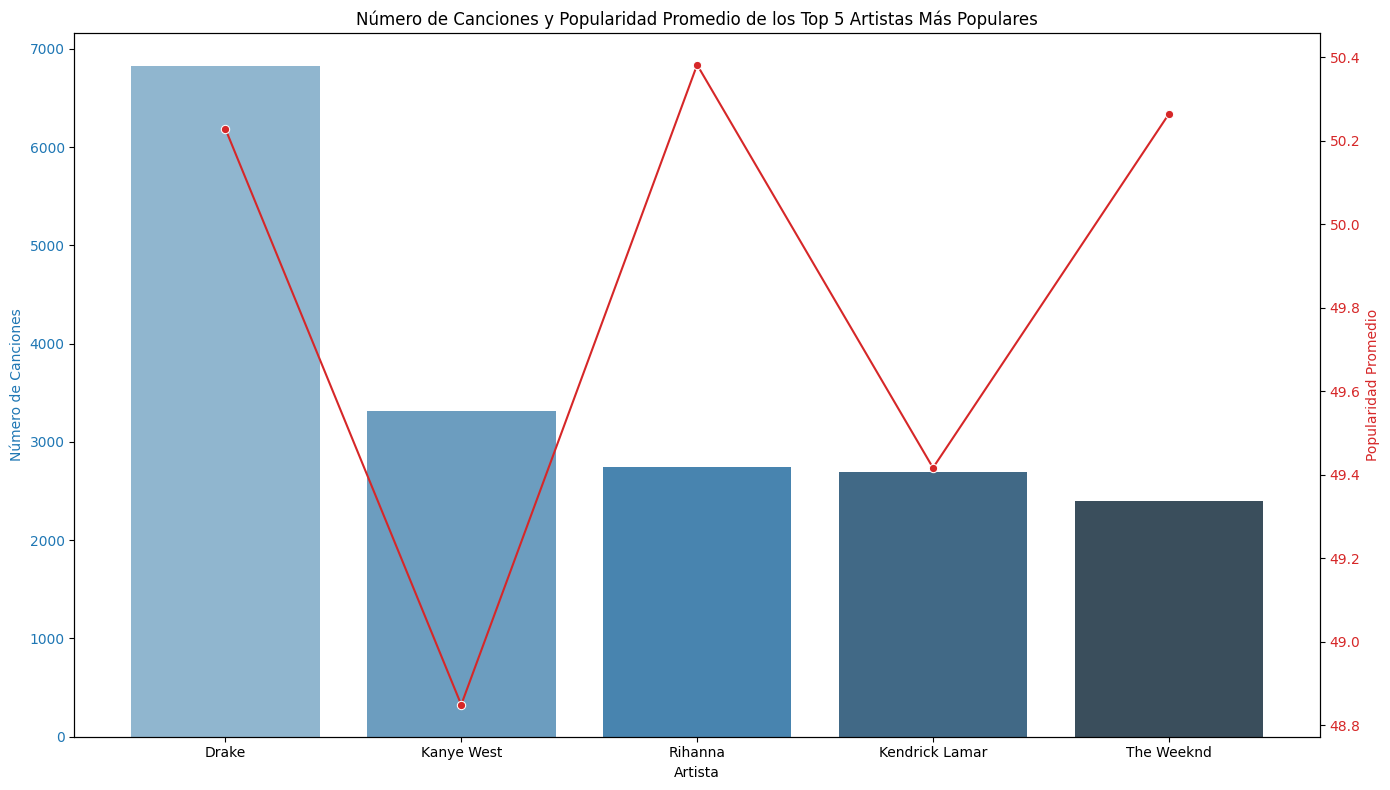

In [60]:
# Para definir el artista mas popular por playlist y cómo ganador por su canción mas popular
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar si la columna 'popularity' existe, si no, agregarla
if 'popularity' not in song_df.columns:
    np.random.seed(0)  # Para reproducibilidad
    song_df['popularity'] = np.random.randint(1, 100, size=len(song_df))

# Verificar los datos de popularidad
print(song_df['popularity'].describe())

# Asegurarse de que la popularidad esté en un rango razonable
song_df = song_df[(song_df['popularity'] >= 0) & (song_df['popularity'] <= 100)]
# Seleccionar los top 5 artistas más populares
top_5_artists = song_df['artist_name'].value_counts().head(5).index
top_5_artists_df = song_df[song_df['artist_name'].isin(top_5_artists)]

# Seleccionar la canción más popular de cada uno de los top 5 artistas
top_songs = top_5_artists_df.loc[top_5_artists_df.groupby('artist_name')['popularity'].idxmax()]
# Calcular el número total de canciones por artista
song_count = top_5_artists_df['artist_name'].value_counts().reindex(top_5_artists)

# Calcular la popularidad promedio por artista
average_popularity = top_5_artists_df.groupby('artist_name')['popularity'].mean().reindex(top_5_artists)

# Crear un DataFrame para los datos combinados
combined_df = pd.DataFrame({
    'song_count': song_count,
    'average_popularity': average_popularity
})

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras para el número de canciones
color = 'tab:blue'
ax1.set_xlabel('Artista')
ax1.set_ylabel('Número de Canciones', color=color)
sns.barplot(x=combined_df.index, y='song_count', data=combined_df, ax=ax1, palette='Blues_d')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Número de Canciones y Popularidad Promedio de los Top 5 Artistas Más Populares')

# Gráfico de líneas para la popularidad promedio
ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje x
color = 'tab:red'
ax2.set_ylabel('Popularidad Promedio', color=color)
sns.lineplot(x=combined_df.index, y='average_popularity', data=combined_df, ax=ax2, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Para ajustar el diseño
plt.xticks(rotation=45)
plt.show()

#CONCUSIÓN
El número de canciones no influye en la popularidad del artista (medida en cantidad de canciones de artistas del top 5 en playlist)
Puede haber variaciones en la forma de medir la popularidad, pero el ejercicio era medir cómo estaban las cnaciones ubicadas en la playlists del top 5 mejores artistas. Drake el artista con mas canciones ha tenido mas usos de estas canciones en playlist pero no le gana a Rihana artista que con años de retirada de la musica y con el tercer puesto de cantidad de canciones supera a todos por popularidad. Mi pregunta es si la base de datos no tiene los datos suficientes o no los cargue bien por que hay datos incongruentes y no aparece Taylor Swift.